## Add necessary imports

In [58]:
import ipywidgets as widgets
from IPython.display import display 
from ipywidgets import interact 
import pandas as pd
from functions import *  
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Get initial data to find index close values


In [51]:
data = pd.read_csv('../docs/data.csv')
# Convertir la columna "Unnamed: 0" a tipo datetime y establecerla como índice
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])
data.set_index('Unnamed: 0', inplace=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA_10,SMA_20,SMA_50,...,deaths_unknown_Syria,deaths_unknown_Jordan,country_Pakistan,country_Iran,country_Turkey,country_Israel,country_Iraq,country_Syria,country_Jordan,conflicts_counts
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2002-01-02,109.785643,110.186893,107.121810,108.826291,60.729124,3.646195e+07,316.156339,107.906098,106.725313,104.614909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-03,109.041778,110.330741,108.228961,109.476767,61.123635,3.377696e+07,307.801220,108.398298,106.901267,104.760061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-04,109.585518,111.625430,108.979265,110.664550,61.830605,2.895490e+07,317.807298,108.777951,106.990244,104.938742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-05,31.116666,31.730000,30.780000,31.316667,18.242754,7.336567e+06,70.038424,31.160333,30.463500,29.583933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-06,35.433333,35.910000,35.135001,35.483334,18.810156,8.641133e+06,75.577684,35.324166,34.474250,34.125767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = data.loc['2011-06-05':'2014-12-05']

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data.loc['2014-06-05':'2014-12-05'], hue= 'Adj Close');

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000023F853C9000> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000023FF40803A0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



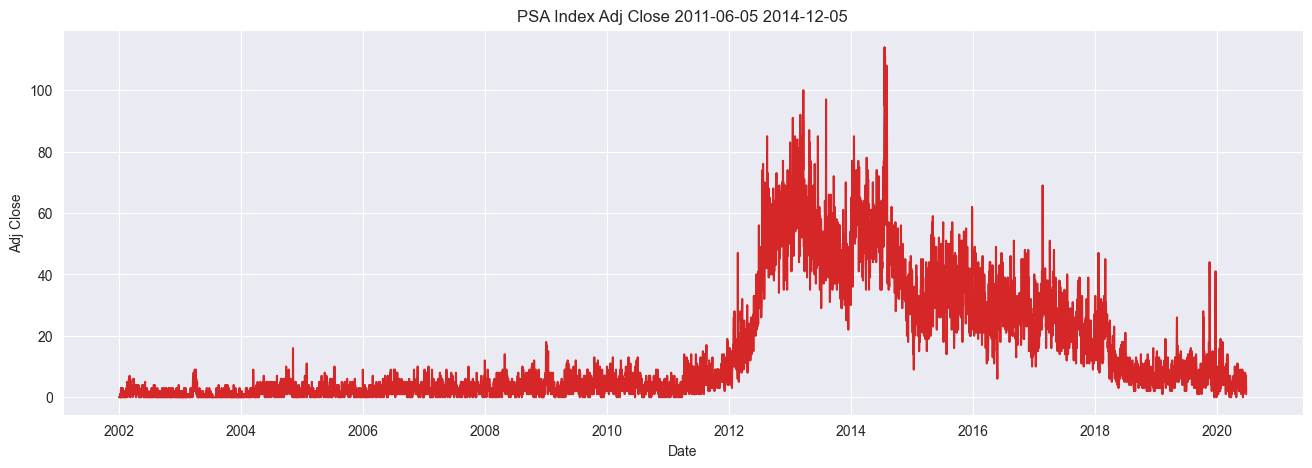

In [8]:

# Draw Plot
def plot_df(data, x, y, title="", xlabel='Date', ylabel='Adj Close', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data.index, y=data.conflicts_counts, title='PSA Index Adj Close 2011-06-05 2014-12-05') 

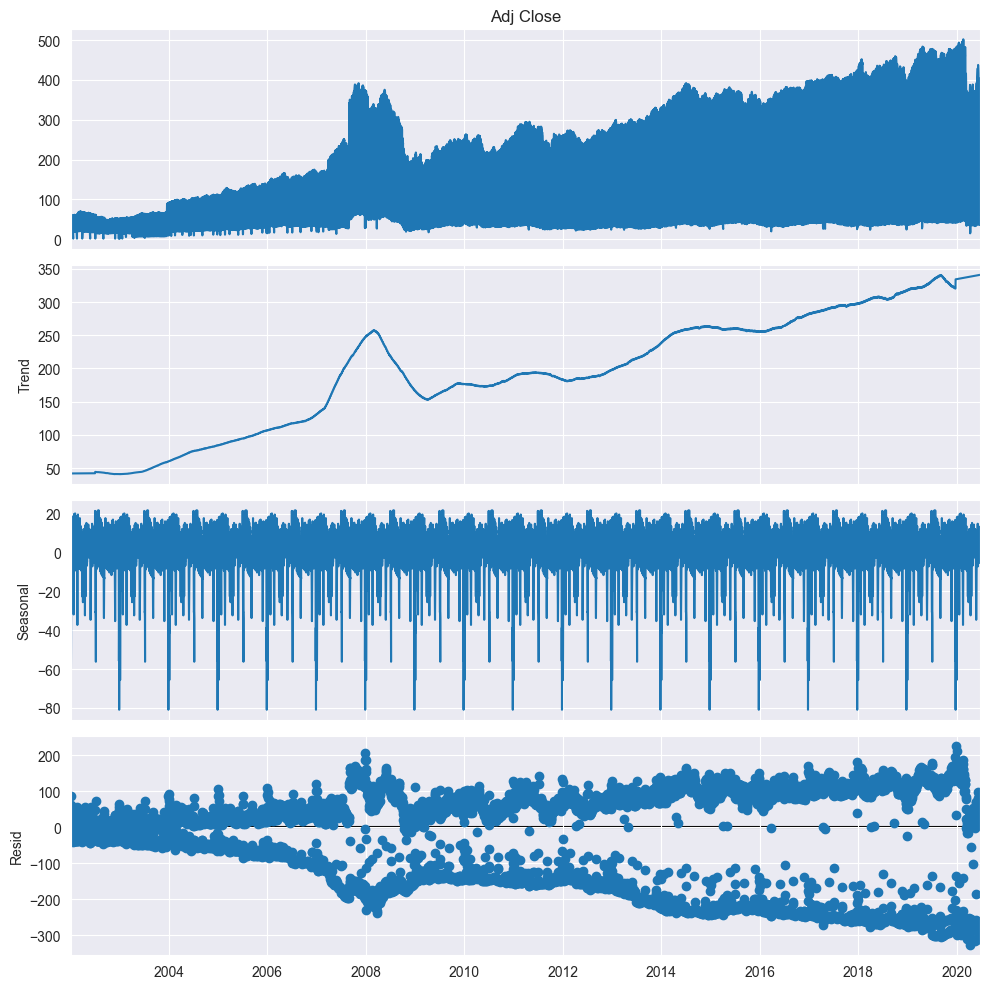

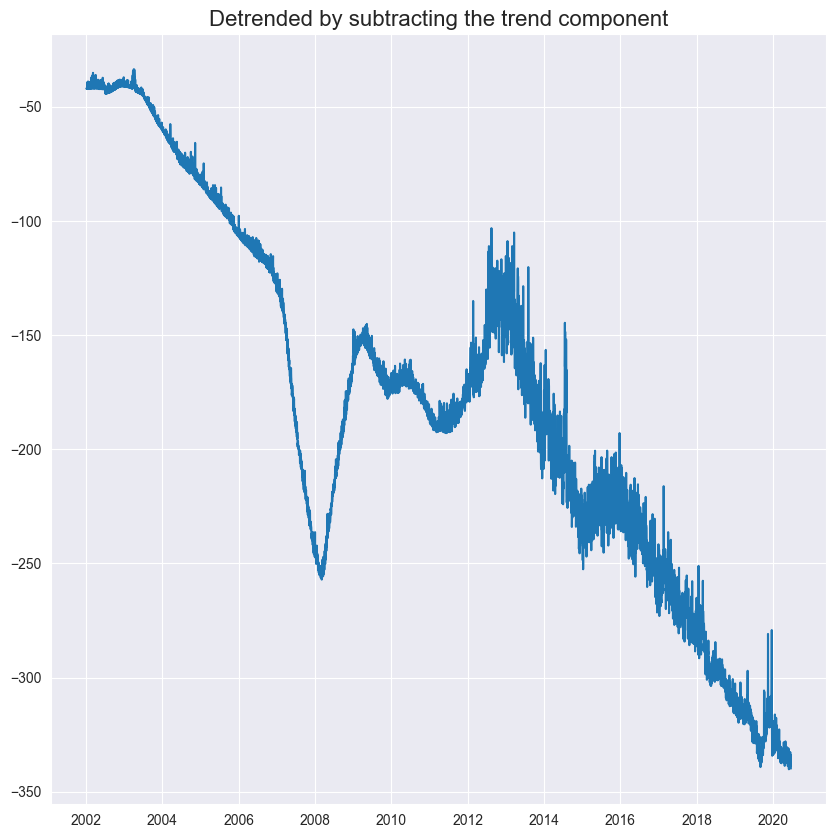

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Especificar el periodo (por ejemplo, si tienes datos diarios y quieres descomponer anualmente, usa 365)
period = 365

# Descomposición aditiva
result_add = seasonal_decompose(data['Adj Close'], model='additive', period=period, extrapolate_trend='freq')

# Plot de la descomposición aditiva
plt.rcParams.update({'figure.figsize': (10, 10)})
result_add.plot()
plt.show()

# Detrend
detrended = data['conflicts_counts'] - result_add.trend
plt.plot(detrended)
plt.title('Detrended by subtracting the trend component', fontsize=16)
plt.show()

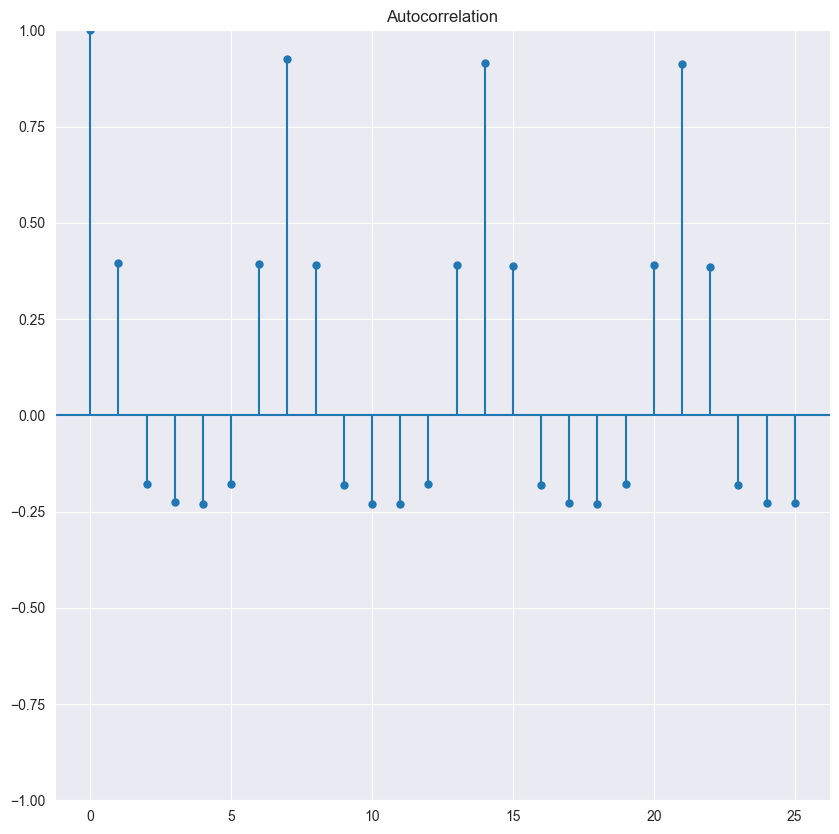

In [10]:
from pmdarima import plot_acf

plot_acf(data['2009-06-05':'2022-12-05']['Adj Close'], lags=25);

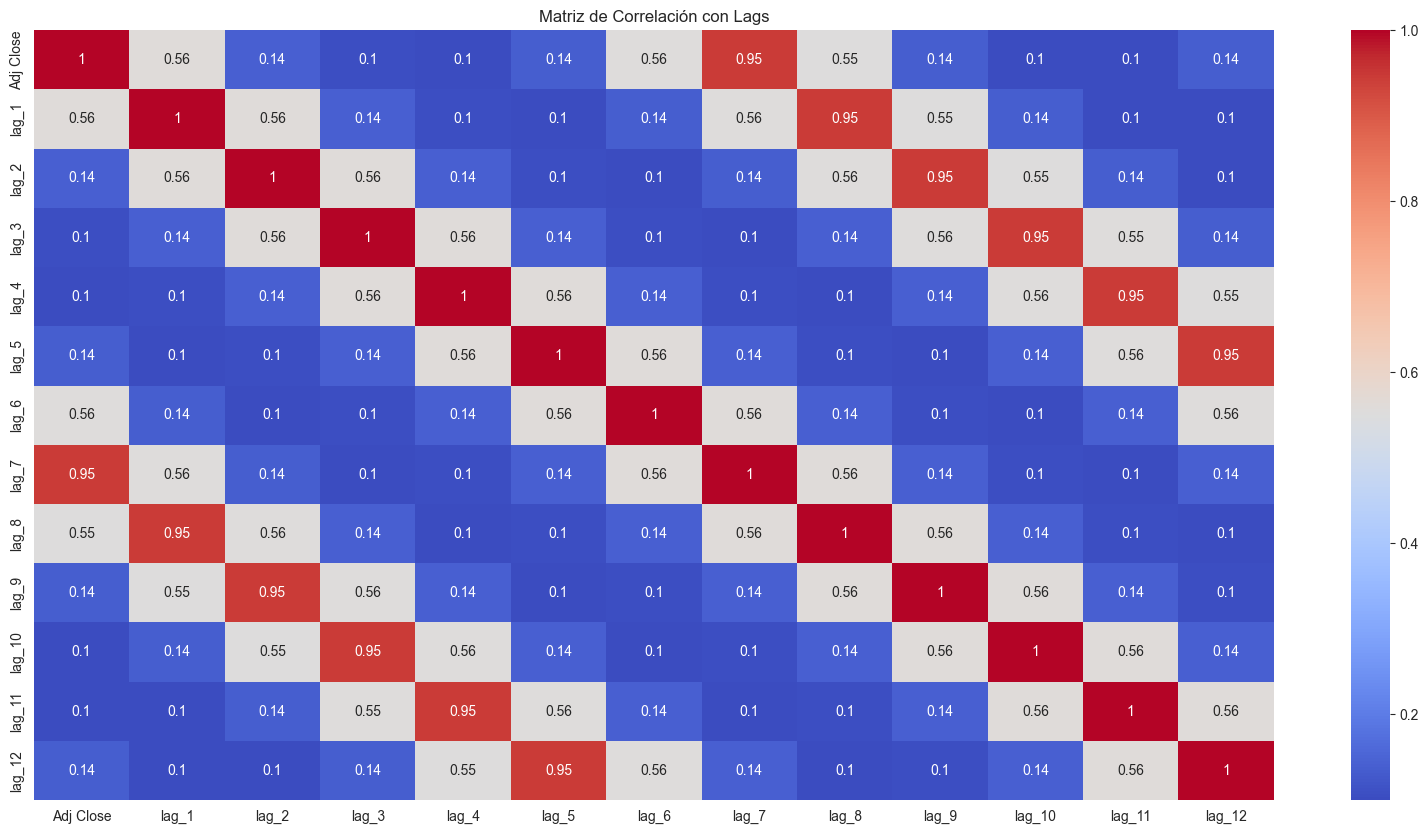

In [11]:
#2
# Creamos columnas para los últimos 5 lags
for lag in range(1, 13):
    data[f'lag_{lag}'] = data['Adj Close'].shift(lag)

# Calculamos la matriz de correlación
correlation_matrix = data[['Adj Close'] + [f'lag_{lag}' for lag in range(1, 13)]].corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación con Lags')
plt.show()

In [12]:
data['Adj Close'].mean()

193.53091036621439

Columnas constantes: ['Disaster Subgroup', 'Disaster Type', 'Country', 'Subregion', 'Region', 'Total Deaths', 'Total Affected', 'CPI', 'change_ipc_eeuu', 'trend_ipc_eeuu', 'deaths_civilians_Jordan', 'deaths_unknown_Turkey', 'deaths_unknown_Jordan', 'country_Jordan']
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15780.730, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15782.659, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15778.730, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.356 seconds
Mean Squared Error (MSE): 17888.26485703051
Root Mean Squared Error (RMSE): 133.74701812388383
Mean Absolute Error (MAE): 81.80994862631748
Mean Absolute Percentage Error (MAPE): 246.9857806612094%
MEAN: 15.173558618645323%
Error Percentage per mean (EPM): 18.54732691246812%


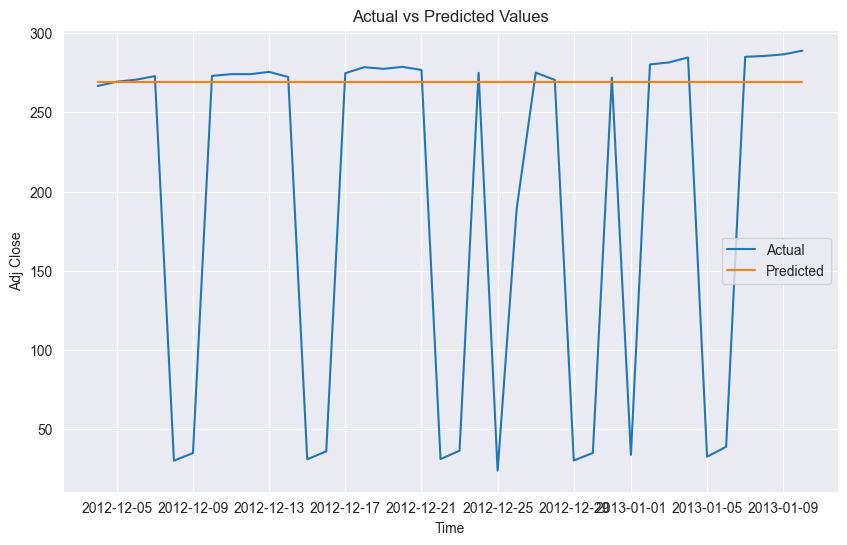

In [13]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['Adj Close'])
target = data['Adj Close']

# Dividir los datos en entrenamiento y prueba
train_features = features.loc['2009-06-05':'2012-12-05']
train_target = target.loc['2009-06-05':'2012-12-05']

test_features = features.loc['2012-12-04':'2013-01-10']
test_target = target.loc['2012-12-04':'2013-01-10']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Estandarizar los datos
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Ajustar el modelo ARIMA con las características exógenas estandarizadas
model_arima = auto_arima(train_target, exogenous=train_features_scaled, 
                         start_p=1, start_q=1, max_p=5, max_q=5, max_d=3, 
                         trace=True, error_action='ignore', suppress_warnings=True, 
                         stepwise=True)

# exogenous=test_features_scaled
# Hacer predicciones

#predictions = model_arima.predict(n_periods=len(test_target), exogenous=test_features_scaled)
predictions = model_arima.predict(n_periods=len(test_target))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test_target, predictions)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(test_target, predictions)

# Calcular el porcentaje del error absoluto medio (MAPE)
mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100

# Mostrar las métricas
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"MEAN: {data['conflicts_counts'].mean()}%")
print(f"Error Percentage per mean (EPM): {data['conflicts_counts'].mean()/mae * 100}%")

# Graficar los valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.plot(test_target, label='Actual')
plt.plot(test_target.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Columnas constantes: ['Disaster Subgroup', 'Disaster Type', 'Country', 'Subregion', 'Region', 'Total Deaths', 'Total Affected', 'CPI', 'change_ipc_eeuu', 'trend_ipc_eeuu', 'deaths_civilians_Jordan', 'deaths_unknown_Turkey', 'deaths_unknown_Jordan', 'country_Jordan']
Correlaciones:
 Open                         0.996661
High                         0.996744
Low                          0.996881
Close                        0.996925
Volume                       0.717727
RSI                          0.914499
SMA_10                       0.995812
SMA_20                       0.994861
SMA_50                       0.992166
SMA_100                      0.987826
SMA_200                      0.983595
EMA_10                       0.996179
EMA_20                       0.995469
EMA_50                       0.993638
EMA_100                      0.991299
EMA_200                      0.988303
EMA_12                       0.996027
EMA_26                       0.995079
MACD                         0.10

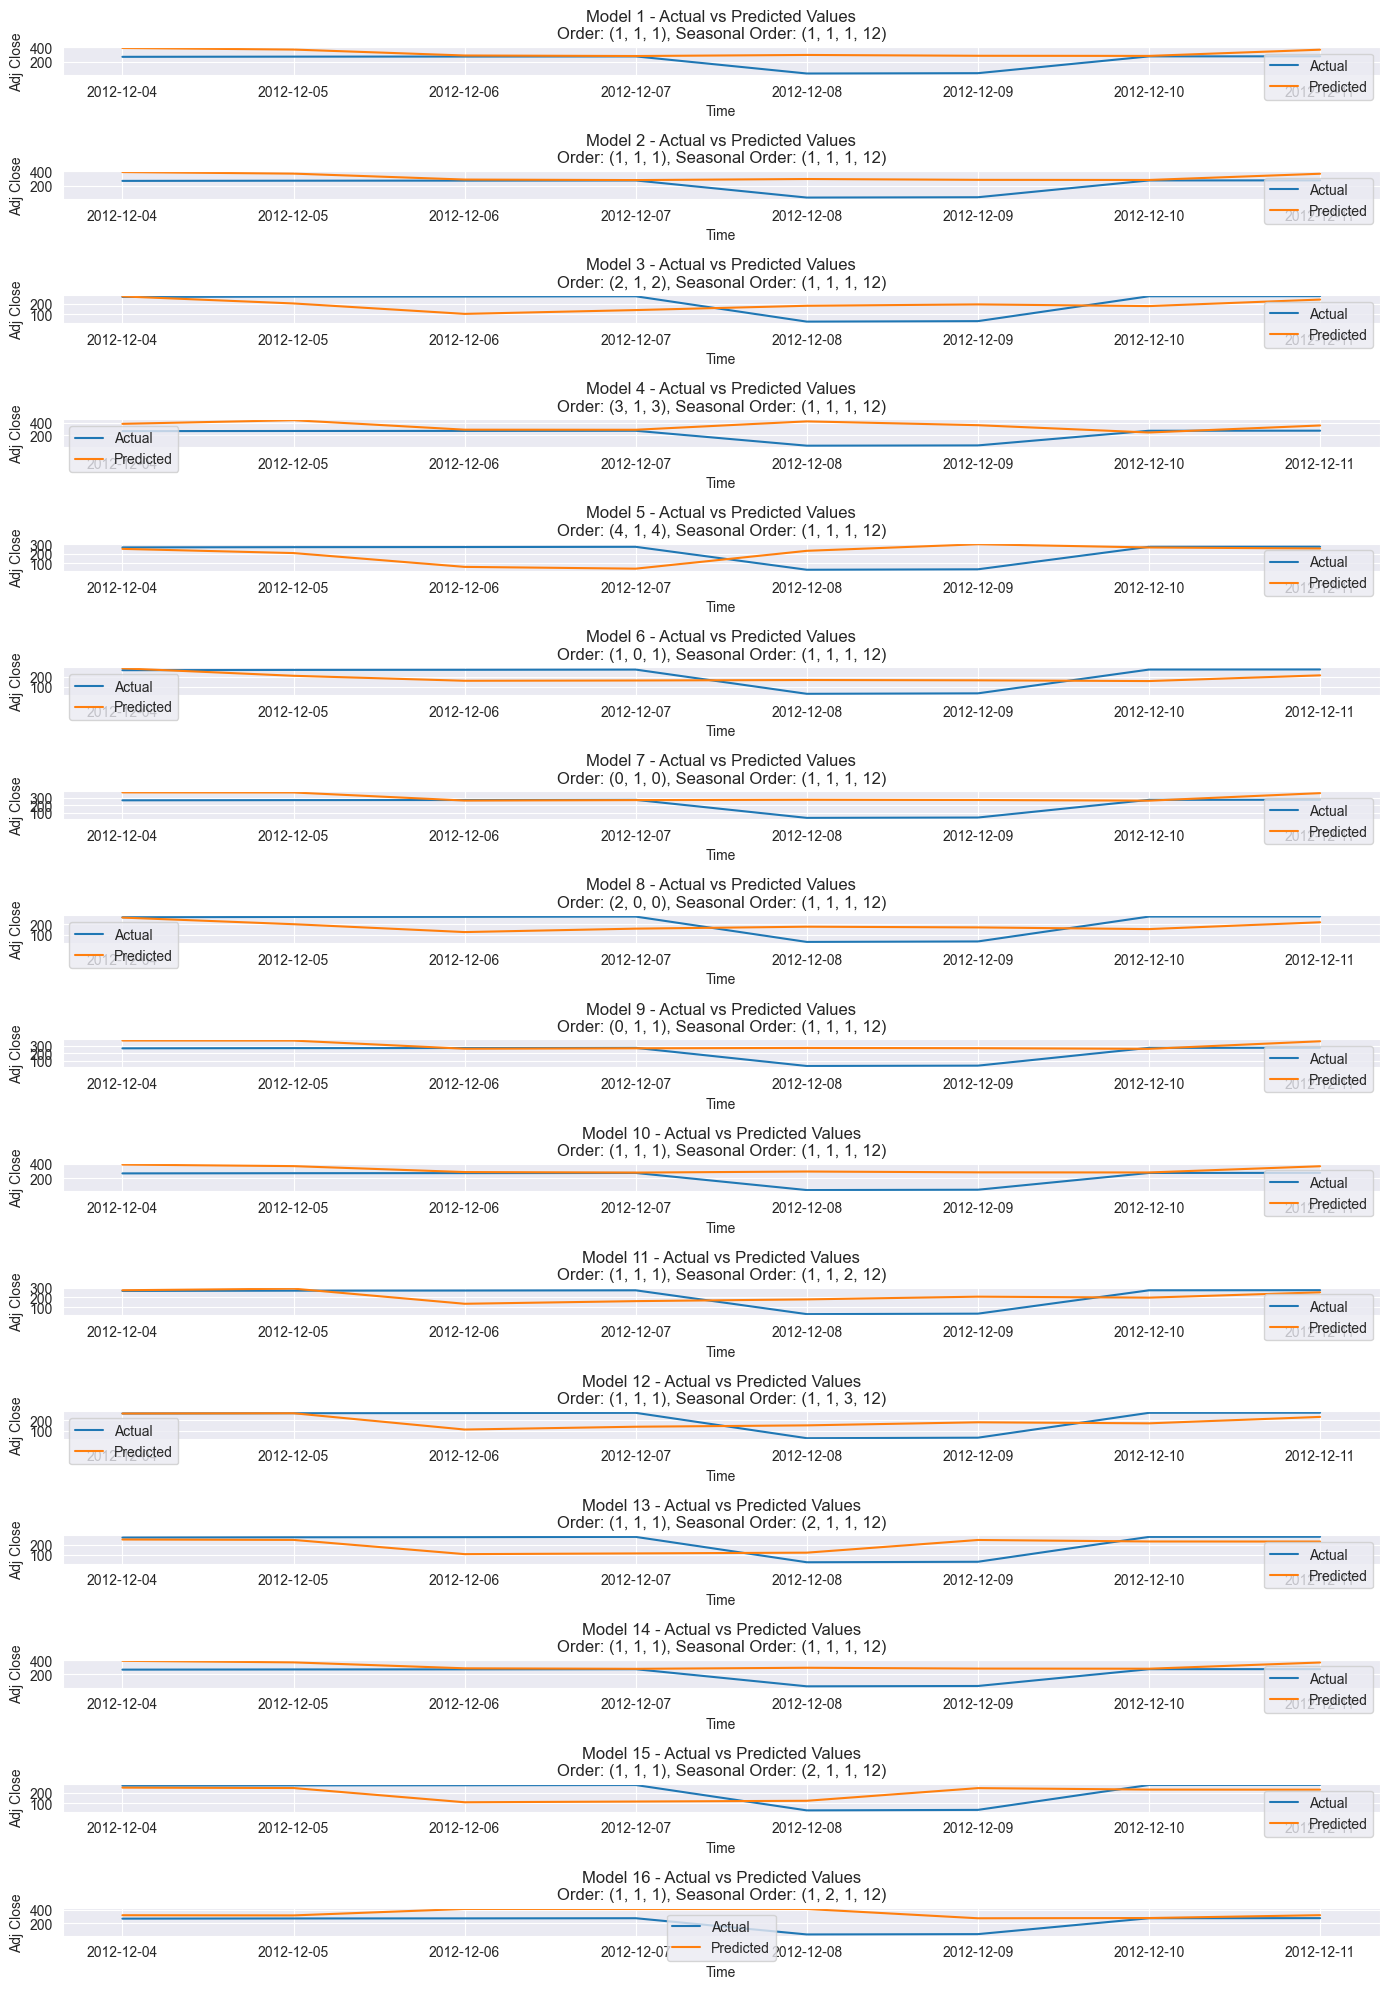

In [16]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle

warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['Adj Close'])
target = data['Adj Close']

# Dividir los datos en entrenamiento y prueba
train_features = features.loc['2009-06-05':'2012-12-05']
train_target = target.loc['2009-06-05':'2012-12-05']

test_features = features.loc['2012-12-04':'2012-12-11']
test_target = target.loc['2012-12-04':'2012-12-11']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.2
important_features = correlation[abs(correlation) >= 0.2].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Usar auto_arima para sugerir parámetros óptimos
stepwise_model = auto_arima(train_target, exogenous=train_features_scaled, seasonal=True, m=12,
                            start_p=1, start_q=1, max_p=5, max_q=5, max_d=2, 
                            start_P=1, start_Q=1, max_P=2, max_Q=2, max_D=1,
                            trace=True, error_action='ignore', suppress_warnings=True, 
                            stepwise=True)

# Imprimir el resumen del modelo sugerido
print(stepwise_model.summary())

# Parámetros sugeridos por auto_arima
order = stepwise_model.order
seasonal_order = stepwise_model.seasonal_order

# Lista de modelos SARIMAX para probar (incluyendo el modelo sugerido por auto_arima)
models = [ # Suggested order from auto_arima
 # Suggested order from auto_arima
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)},

    # Variations on non-seasonal differencing (d)
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)},  # Common starting point
    {'order': (2, 1, 2), 'seasonal_order': (1, 1, 1, 12)},  # More complex non-seasonal
    {'order': (3, 1, 3), 'seasonal_order': (1, 1, 1, 12)},  # Even more complex non-seasonal
    {'order': (4, 1, 4), 'seasonal_order': (1, 1, 1, 12)},  # Higher order non-seasonal
    {'order': (1, 0, 1), 'seasonal_order': (1, 1, 1, 12)},  # No non-seasonal differencing
    {'order': (0, 1, 0), 'seasonal_order': (1, 1, 1, 12)},  # No trend differencing
    {'order': (2, 0, 0), 'seasonal_order': (1, 1, 1, 12)},  # More complex, no differencing
    {'order': (0, 1, 1), 'seasonal_order': (1, 1, 1, 12)},  # Trend differencing only

    # Variations on seasonal differencing (D)
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)},  # Common starting point
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 2, 12)},  # More complex seasonal differencing
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 3, 12)},  # Even more complex seasonal differencing
    {'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)},  # Higher order seasonal differencing

    # Variations on seasonal ARIMA (P, Q) parameters
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)},  # Common starting point
    {'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)},  # More complex seasonal AR
    {'order': (1, 1, 1), 'seasonal_order': (1, 2, 1, 12)},  # More complex
]


# Graficar las predicciones para cada modelo
plt.figure(figsize=(14, 20))
# Mantén un seguimiento del mejor modelo y su error
best_model = None
best_rmse = float('inf')
for i, model_params in enumerate(models):
    model = SARIMAX(train_target, order=model_params['order'], 
                    seasonal_order=model_params['seasonal_order'])
    results = model.fit(disp=False)
        
    predictions = results.predict(start=len(train_target), end=len(train_target) + len(test_target) - 1, 
                                 exog=test_features_scaled)
    mse = mean_squared_error(test_target, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_target, predictions)
    mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100
    
    print(f"Model {i+1} - Order: {model_params['order']}, Seasonal Order: {model_params['seasonal_order']}")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  MAPE: {mape}%\n")
    print(f"Error Percentage per mean (EPM): {data['Adj Close'].mean()/mae * 100}%")
    if rmse < best_rmse:
        best_model = results
        best_rmse = rmse
        best_order = model_params['order']  # Almacena el mejor orden
        best_seasonal_order = model_params['seasonal_order']  # Almacena el mejor orden estacional

    plt.subplot(len(models), 1, i + 1)
    plt.plot(test_target, label='Actual')
    plt.plot(test_target.index, predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Adj Close')
    plt.title(f'Model {i+1} - Actual vs Predicted Values\nOrder: {model_params["order"]}, Seasonal Order: {model_params["seasonal_order"]}')
    plt.legend()
    plt.grid(True)
    
# Guardar el mejor modelo
# Guardar el modelo ARIMA
with open('best_sarimax_model_close.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    
plt.tight_layout()
plt.show()


In [17]:
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
# Ajustar el mejor modelo ARIMA sin variables exógenas usando los parámetros del mejor modelo SARIMAX
arima_model = SARIMAX(train_target, order=best_order, seasonal_order=best_seasonal_order)
arima_results = arima_model.fit()

# Predecir diez días después del conjunto de entrenamiento
future_predictions = arima_results.predict(start=len(train_target), end=len(train_target) + 19)

# Calcular métricas de evaluación para las predicciones
mse_future = mean_squared_error(test_target[:10], future_predictions)
rmse_future = np.sqrt(mse_future)
mae_future = mean_absolute_error(test_target[:10], future_predictions)
mape_future = np.mean(np.abs((test_target[:10] - future_predictions) / test_target[:20])) * 100

# Imprimir las métricas de evaluación para las predicciones futuras
print("Métricas para las predicciones futuras (10 días después del conjunto de entrenamiento):")
print(f"  MSE: {mse_future}")
print(f"  RMSE: {rmse_future}")
print(f"  MAE: {mae_future}")
print(f"  MAPE: {mape_future}%")
print(f"Error Percentage per mean (EPM): {data['Adj Close'].mean()/mae * 100}%")
# Crear un rango de fechas para las predicciones futuras
future_dates = pd.date_range(start=train_target.index[-1], periods=10, freq='D')

# Guardar el modelo ARIMA
with open('sarimax_model_w_p_close.pkl', 'wb') as file:
    pickle.dump(arima_results, file)


ValueError: Found input variables with inconsistent numbers of samples: [8, 20]

Columnas constantes: ['Disaster Subgroup', 'Disaster Type', 'Country', 'Subregion', 'Region', 'Total Deaths', 'Total Affected', 'CPI', 'change_ipc_eeuu', 'trend_ipc_eeuu', 'deaths_civilians_Jordan', 'deaths_unknown_Turkey', 'deaths_unknown_Jordan', 'country_Jordan']
Correlaciones:
 Open                         0.996661
High                         0.996744
Low                          0.996881
Close                        0.996925
Volume                       0.717727
RSI                          0.914499
SMA_10                       0.995812
SMA_20                       0.994861
SMA_50                       0.992166
SMA_100                      0.987826
SMA_200                      0.983595
EMA_10                       0.996179
EMA_20                       0.995469
EMA_50                       0.993638
EMA_100                      0.991299
EMA_200                      0.988303
EMA_12                       0.996027
EMA_26                       0.995079
MACD                         0.10

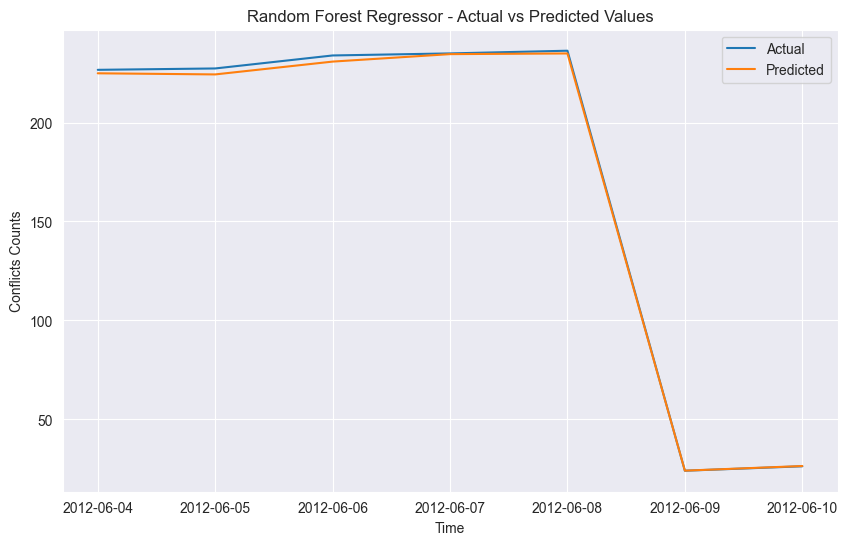

AttributeError: 'RandomForestRegressor' object has no attribute 'save'

In [25]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['Adj Close'])
target = data['Adj Close']

train_features = features.loc['2009-06-05':'2012-12-05']
train_target = target.loc['2009-06-05':'2012-12-05']

test_features = features.loc['2012-06-04':'2012-06-10']
test_target = target.loc['2012-06-04':'2012-06-10']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.2
important_features = correlation[abs(correlation) >= 0.8].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Entrenar un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(train_features_scaled, train_target)

# Hacer predicciones en el conjunto de prueba
predictions = rf_regressor.predict(test_features_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions)
mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Error Percentage per mean (EPM): {data['conflicts_counts'].mean()/mae * 100}%")
# Guardar el mejor modelo
joblib.dump(rf_regressor, 'best_random_forest_model.pkl')
# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target, label='Actual')
plt.plot(test_target.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Conflicts Counts')
plt.title('Random Forest Regressor - Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
rf_regressor.save('Random Forest Regressor_Adj Close.pkl')

Correlaciones:
 Open                0.991390
High                0.991666
Low                 0.991189
Close               0.991457
Volume              0.767457
                      ...   
country_Israel      0.033486
country_Iraq        0.050132
country_Syria      -0.012848
country_Jordan           NaN
conflicts_counts   -0.005182
Length: 72, dtype: float64
Características importantes seleccionadas: ['Open', 'High', 'Low', 'Close', 'RSI', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'EMA_200', 'EMA_12', 'EMA_26', 'MA20', '20dSTD', 'Upper Band', 'Lower Band']
Mejor modelo para Open: Linear Regression con MSE=6.666262235571439e-26
Mejor modelo para High: Linear Regression con MSE=1.6391016726564805e-27
Mejor modelo para Low: Linear Regression con MSE=2.0070638607392968e-26
Mejor modelo para Close: Linear Regression con MSE=9.21614308624561e-27
Mejor modelo para RSI: Linear Regression con MSE=1.2740246262661107e-25
Mejor modelo para SMA_10

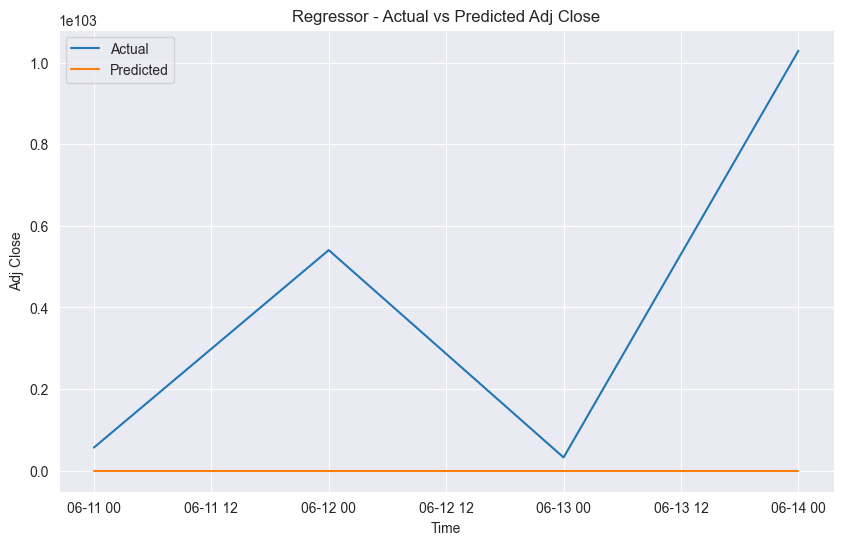

In [35]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb

warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (Adj Close)
features = data.drop(columns=['Adj Close'])
target = data['Adj Close']

# Transformación logarítmica del target
log_target = np.log1p(target)

# Definir los conjuntos de entrenamiento y prueba
train_features = features.loc['2009-06-05':'2012-06-05']
train_target = log_target.loc['2009-06-05':'2012-06-05']

test_features = features.loc['2012-06-04':'2012-06-10']
test_target = log_target.loc['2012-06-04':'2012-06-10']

# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.8
important_features = correlation[abs(correlation) >= 0.8].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Función para entrenar y evaluar un modelo de regresión
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    mse = mean_squared_error(y_valid, predictions)
    return mse, model

# Crear un conjunto de validación a partir del conjunto de entrenamiento
valid_size = int(0.2 * len(train_features_scaled))
X_train, X_valid = train_features_scaled[:-valid_size], train_features_scaled[-valid_size:]
y_train, y_valid = train_target[:-valid_size], train_target[-valid_size:]

# Entrenar y evaluar diferentes modelos para cada característica
best_models = {}
for feature in important_features:
    y_train_feature = train_features_selected[feature][:-valid_size]
    y_valid_feature = train_features_selected[feature][-valid_size:]
    
    models = {
        "Linear Regression": LinearRegression(),
        "Polynomial Regression": PolynomialFeatures(degree=2),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)
    }
    
    best_model_name = None
    best_mse = float('inf')
    best_model = None
    
    for name, model in models.items():
        if name == "Polynomial Regression":
            poly = PolynomialFeatures(degree=2)
            X_train_poly = poly.fit_transform(X_train)
            X_valid_poly = poly.transform(X_valid)
            model = LinearRegression().fit(X_train_poly, y_train_feature)
            mse = mean_squared_error(y_valid_feature, model.predict(X_valid_poly))
        else:
            mse, model = evaluate_model(model, X_train, y_train_feature, X_valid, y_valid_feature)
        
        if mse < best_mse:
            best_mse = mse
            best_model_name = name
            best_model = model
    
    best_models[feature] = best_model
    print(f"Mejor modelo para {feature}: {best_model_name} con MSE={best_mse}")

# Entrenar el modelo para el target (Adj Close)
target_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
target_model.fit(train_features_scaled, train_target)

# Inicializar las predicciones
predictions = []

# Realizar predicciones iterativas para 5 días a partir del último día conocido
current_features = test_features_selected.iloc[-1]
current_features_scaled = scaler.transform([current_features])

for _ in range(4):  # Predecir 5 días en el futuro
    next_day_features = {}
    for feature in important_features:
        if isinstance(best_models[feature], PolynomialFeatures):
            poly = PolynomialFeatures(degree=2)
            current_features_scaled_poly = poly.transform(current_features_scaled)
            next_day_prediction = best_models[feature].predict(current_features_scaled_poly)
        else:
            next_day_prediction = best_models[feature].predict(current_features_scaled)
        next_day_features[feature] = next_day_prediction[0]
    
    # Predecir 'Adj Close'
    next_day_target_prediction = target_model.predict(current_features_scaled)
    predictions.append(np.expm1(next_day_target_prediction[0]))  # Inversión de la transformación logarítmica
    
    # Actualizar current_features_scaled para la siguiente predicción
    current_features = pd.Series(next_day_features)
    current_features_scaled = scaler.transform([current_features])

# Crear un DataFrame para las predicciones
predictions_dates = pd.date_range(start=test_target.index[-1] + pd.Timedelta(days=1), periods=4)
predictions_df = pd.DataFrame(predictions, index=predictions_dates, columns=['Predictions'])

# Calcular métricas de evaluación en el conjunto de prueba
actuals = target.loc[predictions_dates]
mse = mean_squared_error(np.expm1(actuals), predictions_df['Predictions'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.expm1(actuals), predictions_df['Predictions'])
mape = np.mean(np.abs((np.expm1(actuals) - predictions_df['Predictions']) / np.expm1(actuals))) * 100
epm = mae / np.expm1(actuals).mean() * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Error Percentage per Mean (EPM): {epm}%")

# Guardar los mejores modelos
joblib.dump(best_models, 'best_regression_models.pkl')
joblib.dump(target_model, 'best_xgboost_target_model.pkl')

# Graficar las predicciones en el intervalo de prueba
plt.figure(figsize=(10, 6))
plt.plot(np.expm1(actuals).index, np.expm1(actuals), label='Actual')
plt.plot(predictions_df.index, predictions_df['Predictions'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.title('Regressor - Actual vs Predicted Adj Close')
plt.legend()
plt.grid(True)
plt.show()


Correlaciones:
 Open                0.991390
High                0.991666
Low                 0.991189
Close               0.991457
Volume              0.767457
                      ...   
country_Israel      0.033486
country_Iraq        0.050132
country_Syria      -0.012848
country_Jordan           NaN
conflicts_counts   -0.005182
Length: 72, dtype: float64
Características importantes seleccionadas: ['Open', 'High', 'Low', 'Close', 'RSI', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'EMA_200', 'EMA_12', 'EMA_26', 'MA20', '20dSTD', 'Upper Band', 'Lower Band']
Best model for Open: LinearRegression() with params: {}
Best model for High: LinearRegression() with params: {}
Best model for Low: LinearRegression() with params: {}
Best model for Close: LinearRegression() with params: {}
Best model for RSI: LinearRegression() with params: {}
Best model for SMA_10: LinearRegression() with params: {}
Best model for SMA_20: LinearRegression() with p

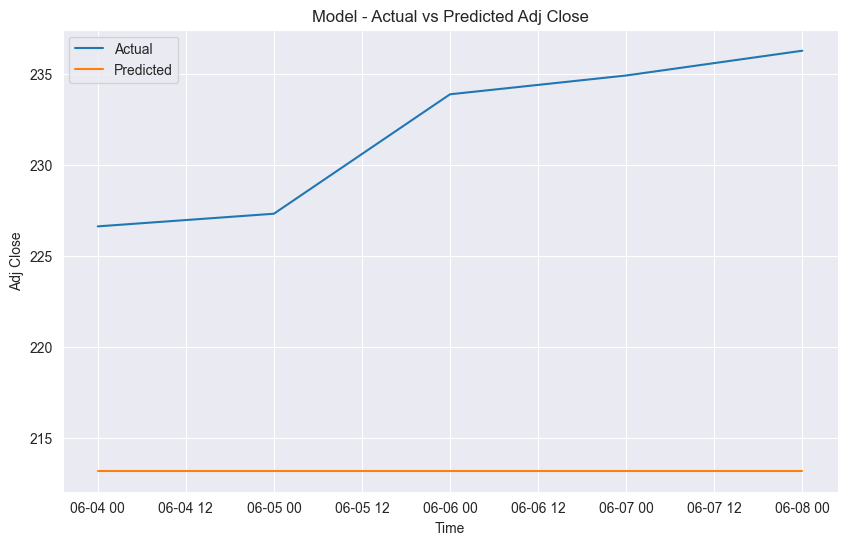

In [43]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (Adj Close)
features = data.drop(columns=['Adj Close'])
target = data['Adj Close']

# Transformación logarítmica del target
log_target = np.log1p(target)

# Definir los conjuntos de entrenamiento y prueba
train_features = features.loc['2009-06-05':'2012-06-05']
train_target = log_target.loc['2009-06-05':'2012-06-05']

test_features = features.loc['2012-06-04':'2012-06-10']
test_target = log_target.loc['2012-06-04':'2012-06-10']

# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.8
important_features = correlation[abs(correlation) >= 0.8].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Función para buscar los mejores hiperparámetros y evaluar un modelo de regresión
def grid_search_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    return best_model, best_params

# Crear un conjunto de validación a partir del conjunto de entrenamiento
valid_size = int(0.2 * len(train_features_scaled))
X_train, X_valid = train_features_scaled[:-valid_size], train_features_scaled[-valid_size:]
y_train, y_valid = train_target[:-valid_size], train_target[-valid_size:]

# Definir los hiperparámetros para Grid Search
param_grids = {
    "Linear Regression": (LinearRegression(), {}),
    "Polynomial Regression": (
        Pipeline([
            ('polynomialfeatures', PolynomialFeatures()),
            ('linearregression', LinearRegression())
        ]),
        {
            'polynomialfeatures__degree': [2, 3],
            'linearregression__fit_intercept': [True, False]
        }
    ),
    "Random Forest": (
        RandomForestRegressor(random_state=42),
        {
            'n_estimators': [100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    )
}

# Entrenar un modelo de regresión para cada característica importante
models = {}
for feature in important_features:
    y_train_feature = train_features_selected[feature][:len(X_train)]
    y_valid_feature = train_features_selected[feature][-valid_size:]

    best_mse = float('inf')
    best_model = None
    best_params = None

    for model_name, (model, param_grid) in param_grids.items():
        model, params = grid_search_model(model, param_grid, X_train, y_train_feature)

        mse = mean_squared_error(y_valid_feature, model.predict(X_valid))
        
        if mse < best_mse:
            best_mse = mse
            best_model = model
            best_params = params

    print(f"Best model for {feature}: {best_model} with params: {best_params}")
    models[feature] = best_model

# Entrenar el modelo para el target
best_mse = float('inf')
best_conflicts_model = None
best_conflicts_params = None

for model_name, (model, param_grid) in param_grids.items():
    model, params = grid_search_model(model, param_grid, X_train, y_train)

    mse = mean_squared_error(y_valid, model.predict(X_valid))
    
    if mse < best_mse:
        best_mse = mse
        best_conflicts_model = model
        best_conflicts_params = params

print(f"Best model for target: {best_conflicts_model} with params: {best_conflicts_params}")

# Realizar predicciones iterativas para 5 días a partir de cada lunes
predictions = []
mondays = test_features_selected[test_features_selected.index.weekday == 0]

for start_date in mondays.index:
    end_date = start_date + pd.Timedelta(days=4)
    if end_date.weekday() != 4:
        continue

    current_features = test_features_selected.loc[start_date]
    current_features_scaled = scaler.transform([current_features])

    for date in pd.date_range(start=start_date, end=end_date, freq='D'):
        if date not in test_features_selected.index:
            break

        next_day_features = {}
        for feature in important_features:
            next_day_prediction = models[feature].predict(current_features_scaled)
            next_day_features[feature] = next_day_prediction[0]

        next_day_conflicts_prediction = best_conflicts_model.predict(current_features_scaled)
        predictions.append((date, next_day_conflicts_prediction[0]))

        current_features = pd.Series(next_day_features)
        current_features_scaled = scaler.transform([current_features])

# Crear un DataFrame para las predicciones
predictions_df = pd.DataFrame(predictions, columns=['Date', 'Predictions'])
predictions_df.set_index('Date', inplace=True)

# Transformar las predicciones de vuelta al espacio original
predictions_df['Predictions'] = np.expm1(predictions_df['Predictions'])

# Transformar el target de prueba de vuelta al espacio original
test_target = np.expm1(test_target)
test_target = test_target[test_target.index.isin(predictions_df.index)]
predictions_df = predictions_df[predictions_df.index.isin(test_target.index)]

# Calcular métricas de evaluación en el conjunto de prueba
mse = mean_squared_error(test_target, predictions_df['Predictions'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions_df['Predictions'])
mape = np.mean(np.abs((test_target - predictions_df['Predictions']) / test_target)) * 100
epm = mae / test_target.mean() * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Error Percentage per Mean (EPM): {epm}%")

# Guardar los mejores modelos
joblib.dump(models, 'best_models.pkl')
joblib.dump(best_conflicts_model, 'best_index_model.pkl')

# Graficar las predicciones en el intervalo de prueba
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target, label='Actual')
plt.plot(predictions_df.index, predictions_df['Predictions'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.title('Model - Actual vs Predicted Adj Close')
plt.legend()
plt.grid(True)
plt.show()


Correlaciones:
 High                0.985954
Low                 0.985044
Close               0.985457
Adj Close           0.968245
Volume              0.712862
                      ...   
country_Israel      0.029412
country_Iraq        0.054139
country_Syria      -0.014319
country_Jordan           NaN
conflicts_counts   -0.006596
Length: 72, dtype: float64
Características importantes seleccionadas: ['High', 'Low', 'Close', 'Adj Close', 'RSI', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'EMA_200', 'EMA_12', 'EMA_26', 'MA20', '20dSTD', 'Upper Band', 'Lower Band', '%D']
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 19.6780 - mae: 4.0153 - val_loss: 15.7891 - val_mae: 3.1065
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3246 - mae: 0.8438 - val_loss: 8.1463 - val_mae: 2.2203
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8762 - mae: 0.6954 - val_loss: 6.2077 - val_mae: 1.9328
Epoch 4/100
48/48 ━━━

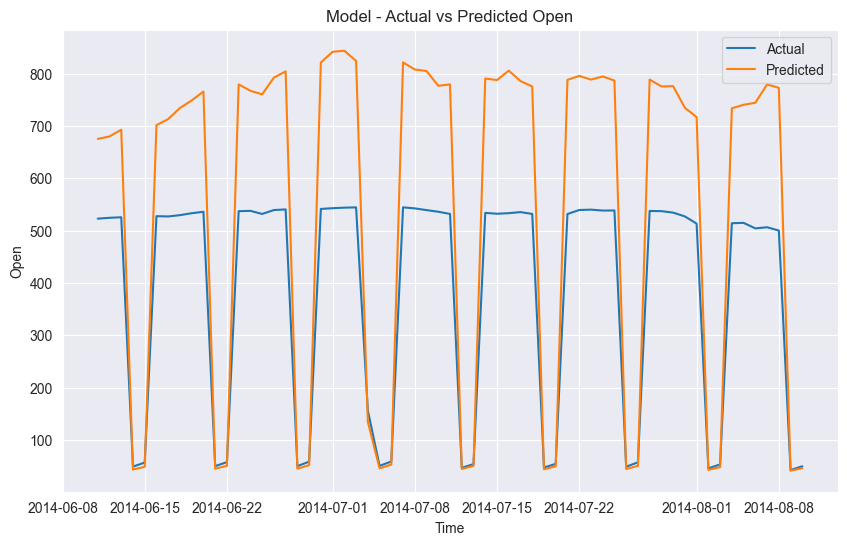

In [56]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (Adj Close)
features = data.drop(columns=['Open'])
target = data['Open']

# Transformación logarítmica del target
log_target = np.log1p(target)

# Definir los conjuntos de entrenamiento y prueba con dos meses adicionales
train_start_date = '2009-06-05'
train_end_date = '2014-08-05'
test_start_date = '2014-06-11'
test_end_date = '2014-08-10'

train_features = features.loc[train_start_date:train_end_date]
train_target = log_target.loc[train_start_date:train_end_date]


# Seleccionar los datos del conjunto de prueba
test_features = features.loc[test_start_date:test_end_date]
test_target = log_target.loc[test_start_date:test_end_date]
# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.8
important_features = correlation[abs(correlation) >= 0.8].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Crear el modelo de red neuronal
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Construir el modelo
model = build_model(train_features_scaled.shape[1])

# Entrenar el modelo
history = model.fit(train_features_scaled, train_target, epochs=100, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
test_predictions = model.predict(test_features_scaled).flatten()
test_target_expm1 = np.expm1(test_target)

# Transformar las predicciones de vuelta al espacio original
test_predictions_expm1 = np.expm1(test_predictions)

# Calcular métricas de evaluación en el conjunto de prueba
mse = mean_squared_error(test_target_expm1, test_predictions_expm1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target_expm1, test_predictions_expm1)
mape = np.mean(np.abs((test_target_expm1 - test_predictions_expm1) / test_target_expm1)) * 100
epm = mae / test_target_expm1.mean() * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Error Percentage per Mean (EPM): {epm}%")

# Graficar las predicciones en el intervalo de prueba
plt.figure(figsize=(10, 6))
plt.plot(test_target_expm1.index, test_target_expm1, label='Actual')
plt.plot(test_target_expm1.index, test_predictions_expm1, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Open')
plt.title('Model - Actual vs Predicted Open')
plt.legend()
plt.grid(True)
plt.show()

# Guardar el modelo
model.save('best_model.h5')


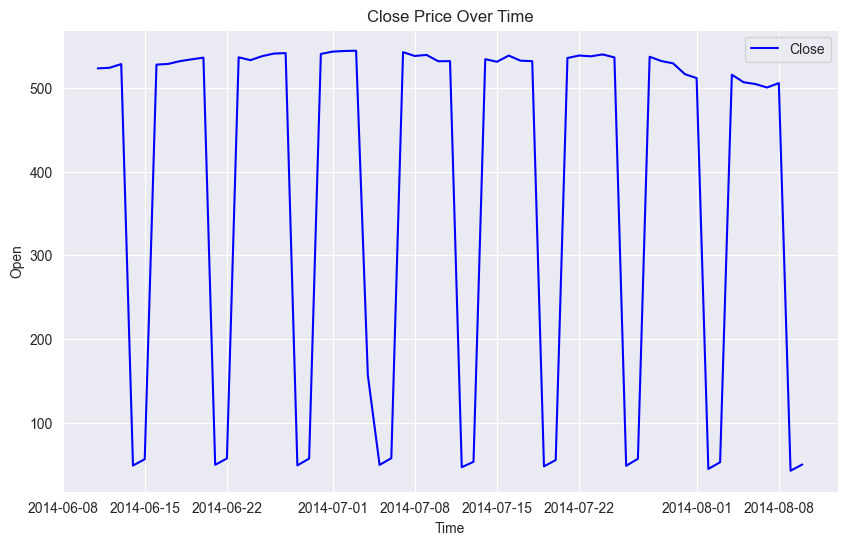

In [57]:
import matplotlib.pyplot as plt

# Plot de los datos en función del precio de cierre (Close) para el período final
plt.figure(figsize=(10, 6))
plt.plot(data.loc[test_start_date:test_end_date].index, data.loc[test_start_date:test_end_date]['Close'], label='Close', color='blue')
plt.xlabel('Time')
plt.ylabel('Open')
plt.title('Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA_10,SMA_20,SMA_50,...,deaths_unknown_Syria,deaths_unknown_Jordan,country_Pakistan,country_Iran,country_Turkey,country_Israel,country_Iraq,country_Syria,country_Jordan,conflicts_counts
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2002-01-02,109.785643,110.186893,107.121810,108.826291,60.729124,3.646195e+07,316.156339,107.906098,106.725313,104.614909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-03,109.041778,110.330741,108.228961,109.476767,61.123635,3.377696e+07,307.801220,108.398298,106.901267,104.760061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-04,109.585518,111.625430,108.979265,110.664550,61.830605,2.895490e+07,317.807298,108.777951,106.990244,104.938742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-05,31.116666,31.730000,30.780000,31.316667,18.242754,7.336567e+06,70.038424,31.160333,30.463500,29.583933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-06,35.433333,35.910000,35.135001,35.483334,18.810156,8.641133e+06,75.577684,35.324166,34.474250,34.125767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
